# Entrenamiento de mi primer modelo
**Objetivo del notebook**  
Aplicar los pasos minimos necesarios para la creación de un modelo de clasificaión, para la detección de cancer de mama 

**Pasos de implementación sugeridos**
* Cargar paquetes
* Carga de datos
* Exploración de datos antes de limpieza
* Limpieza de datos
* Exploración de datos después de la limpieza
* Segmentación de datos
* Experimentación
* Comparación de métricas
* Selección de modelo


**Datos de entrada**
Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina (FNA) de una masa mamaria. Describen características de los núcleos celulares presentes en la imagen. 
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)


**Entregable**  
1. Crear una copia en Drive ( Archivo > Guardar una copia en mi drive)
2. Desarrollar el proyecto
3. Subir el notebook en la tarea correspondiente,
4. Subir modelo entrenado (joblib)
5. Subir un head(10) de tu dataframe que usaste para el entrenamiento (pickle)


## Cargar paquetes

In [25]:
import pandas as pd
import numpy as np
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header = None, names = [
"Sample code number",          
"Clump Thickness",             
"Uniformity of Cell Size",     
"Uniformity of Cell Shape",    
"Marginal Adhesion",           
"Single Epithelial Cell Size", 
"Bare Nuclei",                 
"Bland Chromatin",             
"Normal Nucleoli",             
"Mitoses",                     
"Class"
])

## Exploración de datos antes de limpieza

In [3]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.sample(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
454,1238410,2,3,1,1,3,1,1,1,1,2
214,1222047,10,10,10,10,3,10,10,6,1,4
356,859164,5,3,3,1,3,3,3,3,3,4
176,1201834,2,1,1,1,2,1,3,1,1,2
646,1311033,1,2,2,1,2,1,1,1,1,2


In [6]:
100*(df=="?").sum()/df.shape[0]

Sample code number             0.000000
Clump Thickness                0.000000
Uniformity of Cell Size        0.000000
Uniformity of Cell Shape       0.000000
Marginal Adhesion              0.000000
Single Epithelial Cell Size    0.000000
Bare Nuclei                    2.288984
Bland Chromatin                0.000000
Normal Nucleoli                0.000000
Mitoses                        0.000000
Class                          0.000000
dtype: float64

In [7]:
def missing_percentage(df):
    miss_percent= 100*((df=="?").sum()/len(df))
    miss_percent= miss_percent[miss_percent>0].sort_values()
    return miss_percent
miss_percent= missing_percentage(df)
miss_percent

Bare Nuclei    2.288984
dtype: float64

## Limpieza de datos

In [8]:
#Eliminamos registros donde exista un ?
df = df[df["Bare Nuclei"] != "?"]
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
#Cambiar de objeto a int
df['Bare Nuclei'] = pd.to_numeric(df["Bare Nuclei"])

## Exploración de datos después de la limpieza


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [11]:
miss_percent= missing_percentage(df)
miss_percent

Series([], dtype: float64)

In [12]:
(df=="?").sum()/df.shape[0]

Sample code number             0.0
Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [14]:
#Correlación rápida
df.corr()['Class'].sort_values()

Sample code number            -0.084701
Mitoses                        0.423448
Single Epithelial Cell Size    0.690958
Marginal Adhesion              0.706294
Clump Thickness                0.714790
Normal Nucleoli                0.718677
Bland Chromatin                0.758228
Uniformity of Cell Size        0.820801
Uniformity of Cell Shape       0.821891
Bare Nuclei                    0.822696
Class                          1.000000
Name: Class, dtype: float64

In [ ]:
#Drop columnas con correlación menor
df = df.drop(['Sample code number'], axis=1)
df = df.drop(['Mitoses'], axis=1)

In [19]:
#Proporción de datos de variable dependiente
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

La descripción de los datos dice que la cantidad de registros con clasificación "benigna" es de 357 y con clasificación "maligna" 212. Asumimos que en el atributo "Class", 2 -- benigna y 4 -- maligna.

<AxesSubplot:xlabel='Class', ylabel='count'>

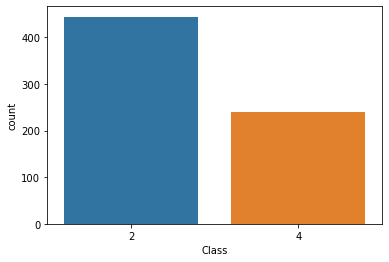

In [23]:
sns.countplot(data=df, x='Class')

<Figure size 6400x6400 with 0 Axes>

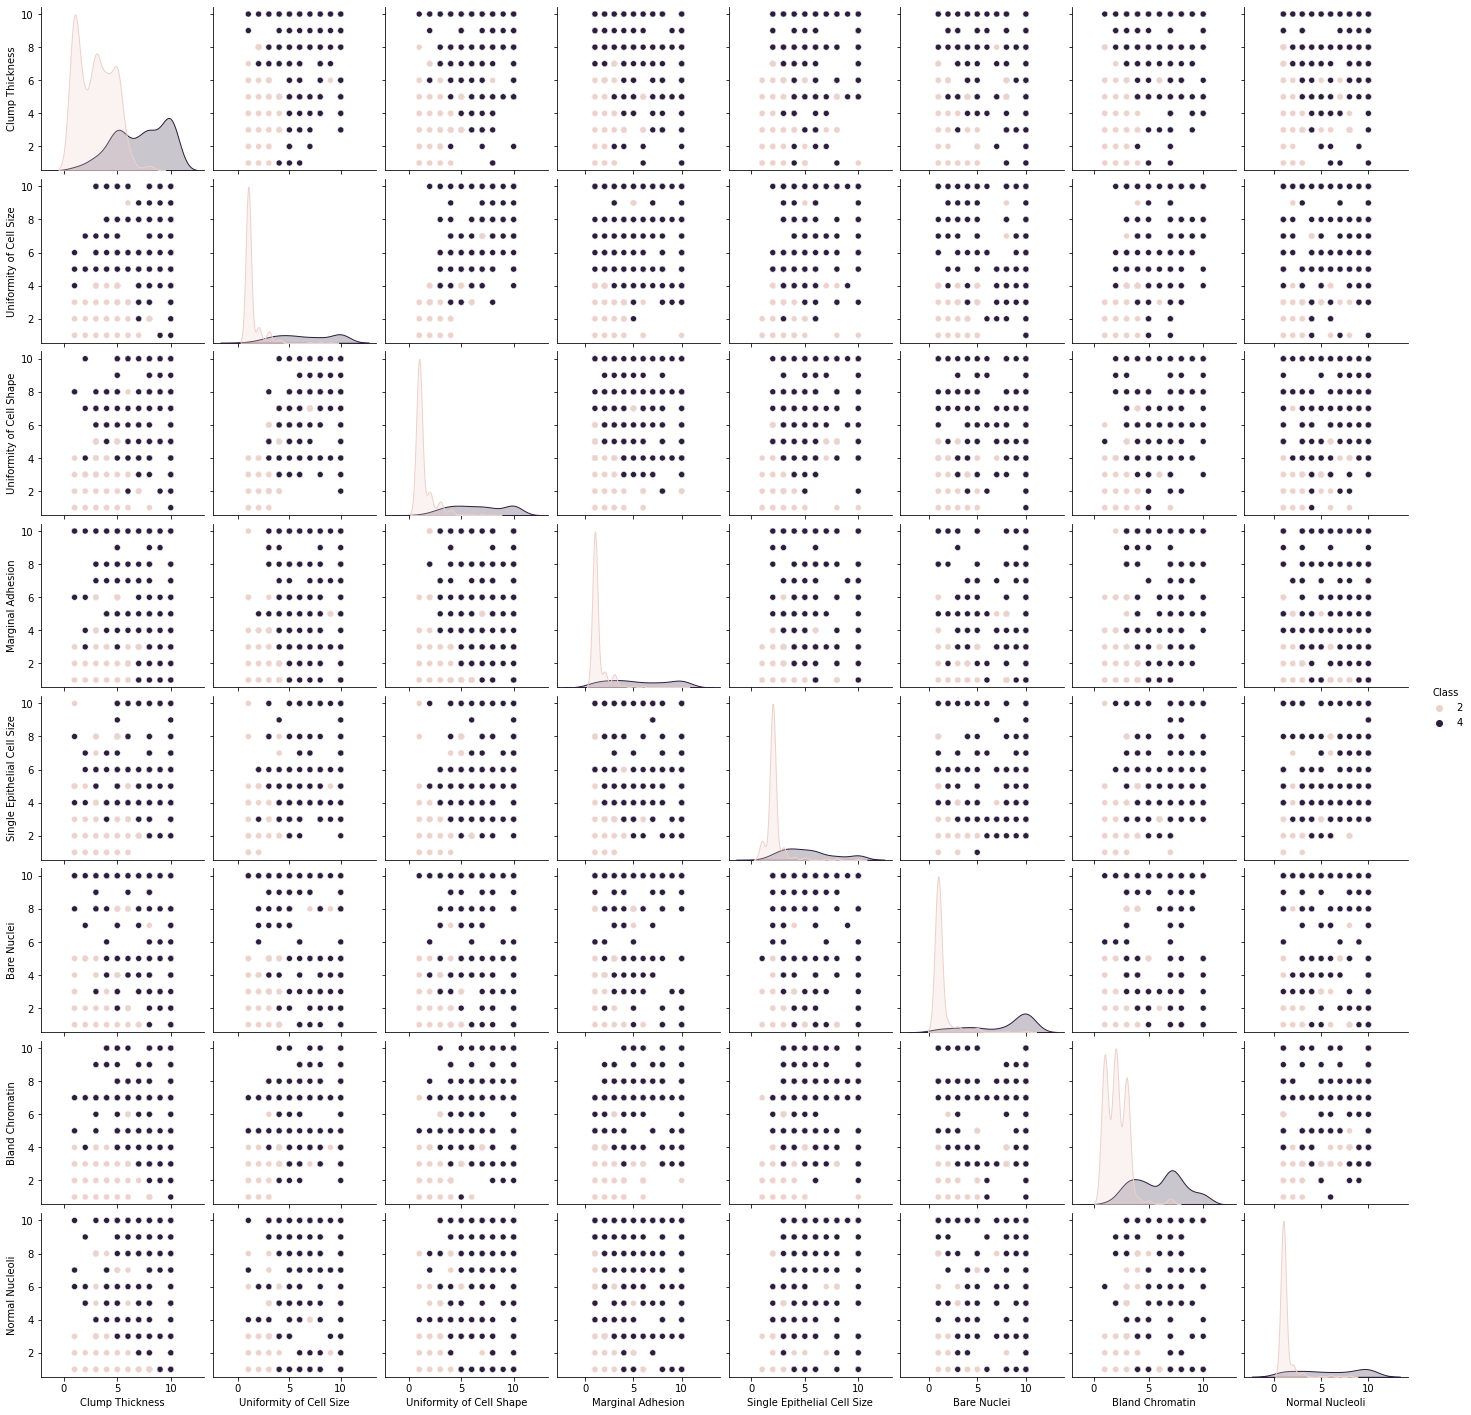

In [26]:
fig = plt.figure(figsize=(8,8), dpi=800)
sns.pairplot(df, hue='Class')

In [29]:
#Seleccionar solo variables numéricas
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [30]:
#Asignar variable dependiente (y quitar muy correlacionadas - muerte vs fecha de fallecimiento) a Y y las independientes a X
X= df_num.drop('Class', axis=1)
y= df_num['Class']

## Segmentación de datos

In [31]:
#Divide tus datos en train test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
#Escalamiento de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_

array([4.28242678, 3.15062762, 3.22803347, 2.93305439, 3.29707113,
       3.58158996, 3.4874477 , 2.86610879])

In [33]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Experimentación
Entrena varios modelos, corrige el códido para que entrenes sólo con los datos de train

In [36]:
#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
#model.fit(df.drop(columns = "Class").iloc[:,:-2],df.Class)
model.fit(scaled_X_train, y_train)

GaussianNB()

In [38]:
#Predict Output
y_pred = model.predict(scaled_X_test)
print("Predicted Value:", y_pred)

Predicted Value: [2 4 2 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 4 4 4 2 4 4 2 4 4 2 2 2 2 4 2
 2 2 2 2 2 4 2 2 2 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 2 4 2 4 4
 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 4 2 2 2 2 2 2 4 2 4 2 2
 4 2 4 2 2 2 2 2 4 2 2 4 4 4 4 4 2 2 2 2 2 2 4 2 4 2 4 2 4 4 2 4 2 4 4 4 2
 2 4 4 2 2 2 2 4 2 4 4 2 4 4 4 4 2 2 2 2 4 2 4 2 4 2 4 2 2 4 4 2 2 2 4 4 2
 2 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 4 2 2 2]


## Comparación de métricas

Accuracy 0.9560975609756097


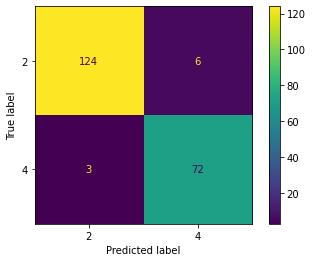

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
print('Accuracy', accuracy_score(y_test, y_pred))
plot_confusion_matrix(model, scaled_X_test, y_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.95      0.96       130
           4       0.92      0.96      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.95       205
weighted avg       0.96      0.96      0.96       205



## Selección de modelo

Accuracy usando Naive Bayes es 95.6% y todas las métricas también están por arriba del 90%, por lo que elegiría este modelo.

## Guardar archivos

In [50]:
#Guardar modelo
from joblib import dump, load
dump(model, 'modelo.joblib') 

['modelo.joblib']

In [52]:
#Guardar head de dataframe que se uso para el entranamiento
df.head(10).to_pickle("ejemplo_entrenamiento.pkl")